## Decision Trees
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will build a Decision Tree in Python and then use it on the Spotify dataset.

In [2]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from sklearn.model_selection import train_test_split

sns.set_theme()

In [3]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()

### Background

The expicitness of a song is something that matters to many Spotify listeners. If a song is explicit, there are many reasons why people may avoid the song (ex. some may choose to not play it in a public setting, or parents may choose to not play it for their children). That being said, being able to predict whether or not a song is explicit based on different audio metrics would be helpful. We will build a Decision Tree Classifier that aims to classify a song as explicit or not-explicit based on metrics such as danceability, energy, loudness, etc.

Accuracy:  0.8727312248668623
              precision    recall  f1-score   support

       False       0.94      0.92      0.93     16857
        True       0.27      0.31      0.29      1545

    accuracy                           0.87     18402
   macro avg       0.60      0.62      0.61     18402
weighted avg       0.88      0.87      0.88     18402



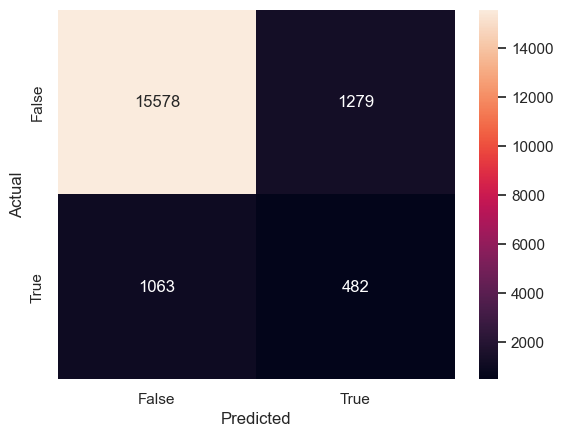

In [7]:
# Build the Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the data

X = df[['danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'popularity']]
y = df['explicit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the test set

y_pred = clf.predict(X_test)

# Evaluate the model

from sklearn.metrics import classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
print(classification_report(y_test, y_pred))

### Error Analysis

Initially, when surveying the accuracy of the model, it may be natural to assume the model is doing a good job. However, when looking at the classification report, we can see that the model is predicting the non-explicit songs quite accurately, but is very innacurate at predicting when a song is explicit. This is because there is a significantly more non-explicit song data than there is explicit song data, and so by fitting the majority of the data to be non-explicit, the model seemingly looks accurate, even if it is a bad predictor of certain types. This is further displayed in the confusion matrix, where nearly 90% of the data is predicted to be not explicit. 

That being said, this model is not a good predictor of whether a song is explict or not.